In [ ]:
from tensorflow import keras
import tensorflow  as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))


### Preprocessing

In [ ]:
x_train = x_train.reshape((-1, 28,28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28,28, 1)).astype('float32') / 255

### Model Definition

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters =128, kernel_size = (3, 3), input_shape = (28, 28, 1), padding ='valid', strides = (1,1), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(filters =64, kernel_size = (3, 3), padding ='valid', strides = (1,1), activation = 'relu'))
model.add(keras.layers.AveragePooling2D(pool_size = (2,2)))
model.add(keras.layers.Conv2D(filters =32, kernel_size = (3, 3), padding ='valid', strides = (1,1), activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units = 256, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))



In [ ]:
model.compile(loss = tf.losses.sparse_categorical_crossentropy,  optimizer = tf.optimizers.Adam(),  metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_25 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 1, 1, 32)        

In [ ]:
hist = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 148s 312ms/step - loss: 0.3920 - accuracy: 0.8771 - val_loss: 0.1183 - val_accuracy: 0.9646
Epoch 2/10
469/469 [==============================] - 158s 337ms/step - loss: 0.1153 - accuracy: 0.9648 - val_loss: 0.0798 - val_accuracy: 0.9751
Epoch 3/10
469/469 [==============================] - 155s 330ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.0606 - val_accuracy: 0.9817
Epoch 4/10
469/469 [==============================] - 153s 327ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.0561 - val_accuracy: 0.9827
Epoch 5/10
469/469 [==============================] - 153s 327ms/step - loss: 0.0553 - accuracy: 0.9829 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 6/10
469/469 [==============================] - 157s 334ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0616 - val_accuracy: 0.9813
Epoch 7/10
469/469 [==============================] - 153s 326ms/step - loss: 0.0423 - accuracy: 0.9871 - val_loss: 0.0505 -

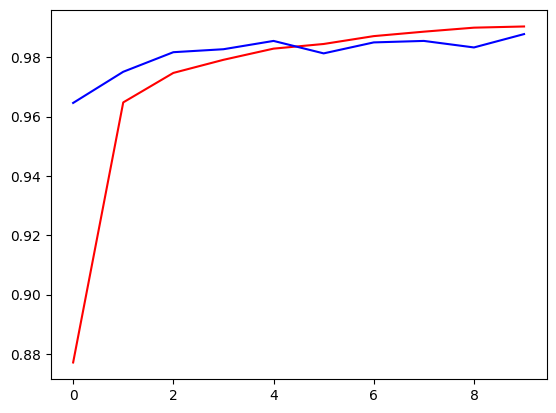

In [ ]:
plt.plot(hist.history['accuracy'], color = 'r')
plt.plot(hist.history['val_accuracy'], color = 'b')